# Bioimage Model Zoo and BioImageArchive integration example notebook

This notebook shows how to benchmark models from the [BioImage Model Zoo](https://bioimage.io) using reference datasets from the [BioImage Archive](https://www.ebi.ac.uk/bioimage-archive/)

### 1. Import necessary dependencies

In [12]:
from bia_bmz_integration import bulk_process
import pandas as pd

### 2. Input BMZ models to benchmark

Let's look at the performance of [loyal squid](https://bioimage.io/#/?tags=loyal-squid&id=10.5281%2Fzenodo.6383429) and [noisy fish](https://bioimage.io/#/?id=10.5281%2Fzenodo.7772662&type=model&tags=noisy-fish) to segment cell nuclei in 3D.

In [13]:
models = [
    "loyal-squid",
    "noisy-fish",
]

### 3. Input reference image and annotation from the BIA

We will test their performance on [S-BIAD1026](https://www.ebi.ac.uk/biostudies/bioimages/studies/S-BIAD1026). A dataset that contains annotated 3D images of Arabidopsis Ovules. 

In [14]:
datasets = {
    "S-BIAD1026": (
        "https://uk1s3.embassy.ebi.ac.uk/bia-zarr-test/1135_n_H2BtdTomato.ome.zarr/0",
        "https://uk1s3.embassy.ebi.ac.uk/bia-zarr-test/1135_n_stain_StarDist_goldGT_180_rotation.ome.zarr/0",
    ),
    "S-BIAD1196": (
        "https://uk1s3.embassy.ebi.ac.uk/bia-zarr-test/patchvolume_001_0000_image.zarr/0",
        "https://uk1s3.embassy.ebi.ac.uk/bia-zarr-test/patchvolume_001_mask.zarr/0",
    ),
        "S-BIAD1492": (
        "https://uk1s3.embassy.ebi.ac.uk/bia-zarr-test/c50_high_image-final_0000.zarr/0",
        "https://uk1s3.embassy.ebi.ac.uk/bia-zarr-test/c50_high_image-labels_0000.zarr/0",
    )
}

### 4. Run benchmarking

We are going to run the models only on a few z planes to speed things up. 

2024-12-19 13:23:15.362 | INFO     | bioimageio.spec._internal.io_utils:open_bioimageio_yaml:112 - loading loyal-squid from https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/loyal-squid/1/files/rdf.yaml


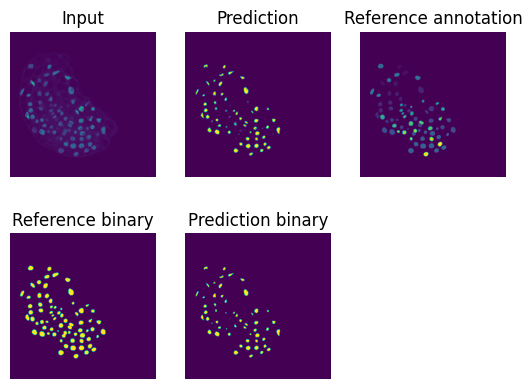

2024-12-19 13:23:29.652 | INFO     | bioimageio.spec._internal.io_utils:open_bioimageio_yaml:112 - loading loyal-squid from https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/loyal-squid/1/files/rdf.yaml


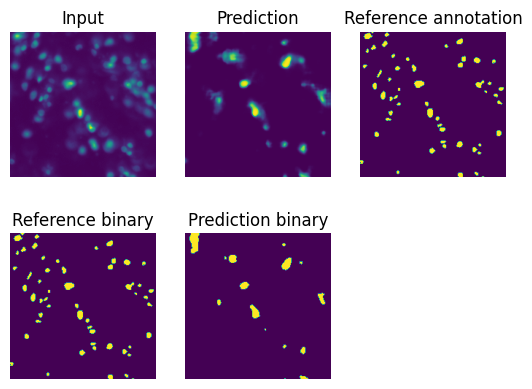

2024-12-19 13:23:32.434 | INFO     | bioimageio.spec._internal.io_utils:open_bioimageio_yaml:112 - loading loyal-squid from https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/loyal-squid/1/files/rdf.yaml


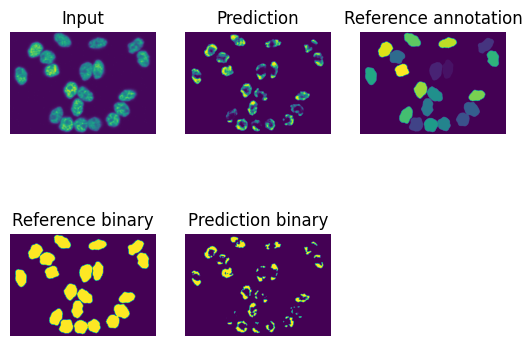

2024-12-19 13:23:38.841 | INFO     | bioimageio.spec._internal.io_utils:open_bioimageio_yaml:112 - loading noisy-fish from https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/noisy-fish/1/files/rdf.yaml


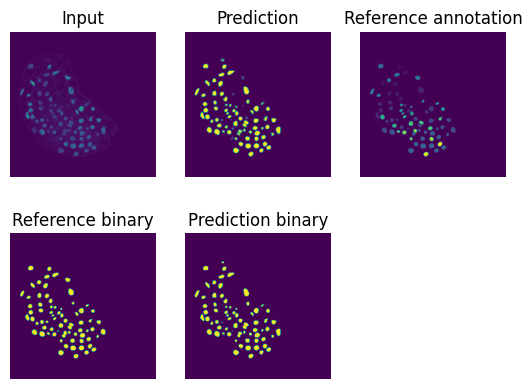

2024-12-19 13:24:16.460 | INFO     | bioimageio.spec._internal.io_utils:open_bioimageio_yaml:112 - loading noisy-fish from https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/noisy-fish/1/files/rdf.yaml


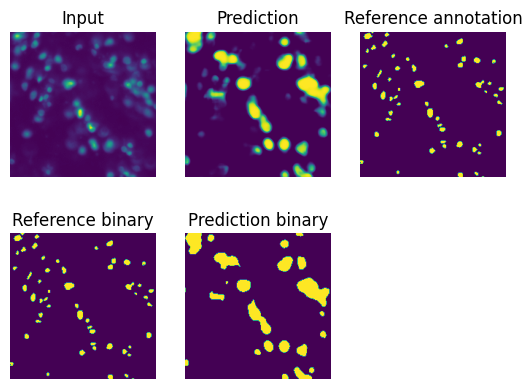

2024-12-19 13:24:20.835 | INFO     | bioimageio.spec._internal.io_utils:open_bioimageio_yaml:112 - loading noisy-fish from https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/noisy-fish/1/files/rdf.yaml


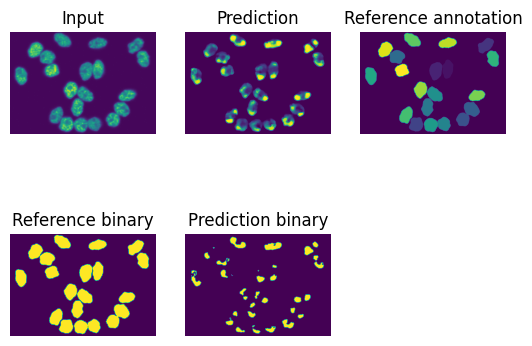

In [15]:
#scores = bulk_process(models, datasets, z_planes=[170, 178], crop_image=[512, 512])
scores = bulk_process(models, datasets,z_planes=[70, 78])

### 5. Display benchmarking metrics

Here we can have a look at the benchmarking scores. The relevant metrics for segmentation are: precision, recall, IoU and Dice. The scores vary from 0 to 1, with 1 denoting the most similarity between the model's prediction and the reference annotation.

In [16]:
#idx = pd.IndexSlice
#display(scores.loc[idx[:,["Precision", "Recall","IoU","Dice"]],idx[:]])
display(scores)

Dataset: S-BIAD1026  Dataset: S-BIAD1196  \
Model              Score                                                 
Model: loyal-squid Precision                0.994                0.356   
                   Recall                   0.392                0.280   
                   IoU                      0.391                0.186   
                   Dice                     0.563                0.313   
                   PSNR                    19.063               13.797   
                   NRMSE                    0.111                0.204   
                   SSIM                     0.930                0.666   
Model: noisy-fish  Precision                0.920                0.183   
                   Recall                   0.839                0.564   
                   IoU                      0.782                0.161   
                   Dice                     0.878                0.277   
                   PSNR                    19.081               10.221   
                   NRMSE                    0.111                0.308   
                   SSIM                     0.931                0.481   

                              Dataset: S-BIAD1492  
Model              Score                           
Model: loyal-squid Precision                1.000  
                   Recall                   0.412  
                   IoU                      0.412  
                   Dice                     0.584  
                   PSNR                    11.864  
                   NRMSE                    0.255  
                   SSIM                     0.775  
Model: noisy-fish  Precision                0.967  
                   Recall                   0.599  
                   IoU                      0.587  
                   Dice                     0.740  
                   PSNR                    11.980  
                   NRMSE                    0.252  
                   SSIM                     0.786

It seems that noisy-fish is better at segmenting Arabidospsis ovules than loyal-squid, this makes sense because noisy-fish was trained precisely for this!